**Dynamic Price Optimization of a Product**

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import inventorize as inv
import matplotlib.pyplot as plt

In [3]:
price = [5,10,15,17,20,23,25]
demand = [600,550,700,680,500,400,250]

In [4]:
pricing_data = pd.DataFrame({'price': price,'demand': demand})
pricing_data

,price,demand
0,5,600
1,10,550
2,15,700
3,17,680
4,20,500
5,23,400
6,25,250


Text(0, 0.5, 'demand')

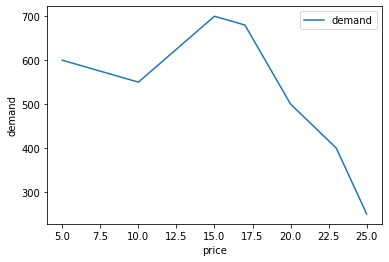

In [8]:
ax = pricing_data.plot(x = 'price', y = 'demand', style='-')
# sns.scatterplot(x = 'price', y = 'demand', data = pricing_data)
ax.set_xlabel("price")
ax.set_ylabel("demand")

**Linear Elastic Model**

In [11]:
model= LinearRegression()
model.fit(pricing_data[['price']],pricing_data[['demand']])
model.intercept_[0], model.coef_[0][0]

(766.2699905926621, -14.642521166509873)

In [12]:
guava_cost=2.5

In [58]:
simulation_data = pd.DataFrame({'price': range(1,50)})
simulation_data['expected_demand']= model.intercept_[0]+model.coef_[0]*simulation_data['price']
simulation_data.head()

,price,expected_demand
0,1,751.627469
1,2,736.984948
2,3,722.342427
3,4,707.699906
4,5,693.057385


In [ ]:
plt.plot(simulation_data['price'], simulation_data['expected_demand'], label='demand')
plt.xlabel('simulated price')
plt.ylabel('simulated demand')
plt.show()

In [59]:
simulation_data['cost_price'] = simulation_data['expected_demand'] * guava_cost
simulation_data['selling_price'] = simulation_data['expected_demand'] * simulation_data['price']
simulation_data.head()

,price,expected_demand,cost_price,selling_price
0,1,751.627469,1879.068674,751.627469
1,2,736.984948,1842.462371,1473.969897
2,3,722.342427,1805.856068,2167.027281
3,4,707.699906,1769.249765,2830.799624
4,5,693.057385,1732.643462,3465.286924


In [60]:
simulation_data['profit'] = simulation_data['selling_price']- simulation_data['cost_price']
simulation_data.head()

,price,expected_demand,cost_price,selling_price,profit
0,1,751.627469,1879.068674,751.627469,-1127.441204
1,2,736.984948,1842.462371,1473.969897,-368.492474
2,3,722.342427,1805.856068,2167.027281,361.171214
3,4,707.699906,1769.249765,2830.799624,1061.549859
4,5,693.057385,1732.643462,3465.286924,1732.643462


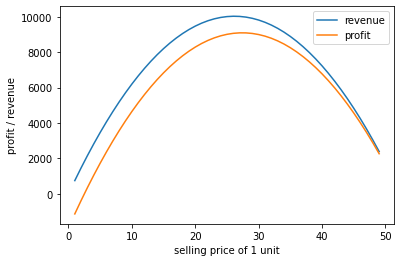

In [64]:
plt.plot(simulation_data['price'], simulation_data['selling_price'], label = 'revenue')
plt.plot(simulation_data['price'], simulation_data['profit'], label = 'profit')
plt.legend()
plt.xlabel('selling price of 1 unit')
plt.ylabel('profit / revenue')
plt.show()

In [34]:
simulation_data[simulation_data['profit'] == max(simulation_data['profit'])]

,price,expected_demand,total_cost,revenue,profit
26,27,370.921919,927.304798,10014.891816,9087.587018


In [35]:
simulation_data[simulation_data['revenue'] == max(simulation_data['revenue'])]

,price,expected_demand,total_cost,revenue,profit
25,26,385.56444,963.911101,10024.675447,9060.764346


**Optima using Inventorize Library (LINEAR MODELS)**

In [50]:
result = inv.linear_elasticity(pricing_data['price'], pricing_data['demand'], 2.5, 2.5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [51]:
result

{'Elasticity': array([[0.05016873]]),
 'optimum_price_profit': array([[27.41591712]]),
 'optimum_price_revenue': array([[26.16591712]])}

**Optima using Inventorize Library (NON LINEAR MODELS)**

In [79]:
logit_linear = inv.single_product_optimization(price, demand, 'Guava', 2.5)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:496: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x0 = np.asarray(x0)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [80]:
new_simulated_data = logit_linear['simulated data']
new_simulated_data.head()

,x,predicted_linear,predicted_logit,revenue_linear,revenue_logit,profit_linear,profit_logit,predicted_poly,revenue_poly,profit_poly
0,-7.806472,880.576416,512.608727,-6874.194763,-4001.665456,-6874.194763,-4001.665456,1653.921020,-12911.287432,-12911.287432
1,-6.806472,865.933895,513.630096,-5893.954443,-3496.008652,-5893.954443,-3496.008652,1474.831000,-10038.395284,-10038.395284
2,-5.806472,851.291374,514.861834,-4942.999166,-2989.530605,-4942.999166,-2989.530605,1316.098983,-7641.891341,-7641.891341
3,-4.806472,836.648852,516.344685,-4021.328930,-2481.796055,-4021.328930,-2481.796055,1176.573443,-5655.166812,-5655.166812
4,-3.806472,822.006331,518.126446,-3128.943737,-1972.233592,-3128.943737,-1972.233592,1055.102851,-4016.219015,-4016.219015


In [81]:
new_simulated_data_clean = new_simulated_data[new_simulated_data>0]

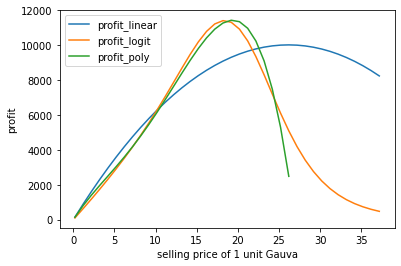

In [93]:
plt.plot(new_simulated_data_clean['x'], new_simulated_data_clean['profit_linear'], label = 'profit_linear')
plt.plot(new_simulated_data_clean['x'], new_simulated_data_clean['profit_logit'], label = 'profit_logit')
plt.plot(new_simulated_data_clean['x'], new_simulated_data_clean['profit_poly'], label = 'profit_poly')
plt.legend()
plt.xlabel('selling price of 1 unit Gauva')
plt.ylabel('profit')
plt.show()

In [83]:
logit_linear['point_of_maximum_profits']

{'linear': array([26.19352842]),
 'logit': array([18.19352842]),
 'poly': array([19.19352842])}

In [89]:
preds = logit_linear['predictions']
preds

,x,y,lm_p,poly_p,logit_p
0,5,600,693.057385,585.881308,558.225194
1,10,550,619.844779,603.321961,615.604567
2,15,700,546.632173,645.885098,670.744617
3,17,680,517.347131,637.701895,656.449371
4,20,500,473.419567,569.629858,551.424175
5,23,400,429.492004,406.964496,370.288847
6,25,250,400.206961,230.615384,252.617168


In [92]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(preds['lm_p'], preds['y']))
print('MSE for Linear Model:', mse)
mse = np.sqrt(mean_squared_error(preds['logit_p'], preds['y']))
print('MSE for Logit Model:', mse)
mse = np.sqrt(mean_squared_error(preds['poly_p'], preds['y']))
print('MSE for Poly Model:', mse)

MSE for Linear Model: 111.90177143703252
MSE for Logit Model: 39.62980688101355
MSE for Poly Model: 43.148756084564006


In [86]:
logit_linear['best_model']

'best_model is Logit modelfor Guava'